<a href="https://colab.research.google.com/github/arthurfalcao/decision-support-systems/blob/master/Linear%20Regression/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SIAD - Regressão Linear  - Don Pastello

## Descrição

## Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>data</b> - Data</li>
    <li><b>venda_dia</b> - Valor de vendas no dia (R&#36;)</li>
    <li><b>valor_canc</b> - Valor cancelado (R&#36;)</li>
    <li><b>fds</b> - Final de Semana (1 = Sim; 0 = Não)</li>
</ul>

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [0]:
dataframe = pd.read_csv('./don_pastello.csv', sep=',')
dataframe

,data,venda_dia,venda_acum,venda_media,proj_acum,merc_dia,merc_acum,perc_merc,dif_dia_caixa,dif_acum,valor_canc,perc_canc,canc_acum,perc_canc_acum,fds
0,01/08/2019,4944.70,4944.70,4944.70,4944.70,608.53,608.53,12.31,-1.90,-1.90,817.63,16.54,817.63,16.54,0
1,02/08/2019,6415.50,11360.20,5680.10,11360.20,0.00,608.53,5.36,-0.75,-2.65,769.85,12.00,1587.48,13.97,0
2,03/08/2019,7262.90,18623.10,6207.70,18623.10,0.00,608.53,3.27,-9.62,-12.27,647.18,8.91,2234.66,12.00,1
3,04/08/2019,6069.90,24693.00,6173.25,24693.00,0.00,608.53,2.46,5.45,-6.82,1073.59,17.69,3308.25,13.40,1
4,05/08/2019,7113.40,31806.40,6361.28,31806.40,2340.03,2948.56,9.27,-15.95,-22.77,1172.27,16.48,4480.52,14.09,0
5,06/08/2019,6646.40,38452.80,6408.80,38452.80,7517.14,10465.70,27.22,-0.60,-23.37,961.06,14.46,5441.58,14.15,0
6,07/08/2019,6047.20,44500.00,6357.14,44500.00,177.31,10643.01,23.92,-55.70,-79.07,1026.44,16.97,6468.02,14.53,0
7,08/08/2019,6312.60,50812.60,6351.58,50812.60,13.65,10656.66,20.97,0.10,-78.97,1036.60,16.42,7504.62,14.77,0
8,09/08/2019,8156.70,58969.30,6552.14,58969.30,839.53,11496.19,19.50,30.65,-48.32,1141.23,13.99,8645.85,14.66,0
9,10/08/2019,9312.00,68281.30,6828.13,68281.30,0.00,11496.19,16.84,43.05,-5.27,1529.15,16.42,10175.00,14.90,1


## Estatísticas descritivas

In [0]:
dataframe.describe().round(2)

,venda_dia,venda_acum,venda_media,proj_acum,merc_dia,merc_acum,perc_merc,dif_dia_caixa,dif_acum,valor_canc,perc_canc,canc_acum,perc_canc_acum,fds
count,31.00,31.00,31.00,31.00,31.00,31.00,31.00,31.00,31.00,31.00,31.00,31.00,31.00,31.00
mean,6294.16,101234.61,6304.53,101234.61,1450.97,21961.91,19.40,-69.20,-165.19,912.84,14.48,14926.08,14.64,0.29
std,1049.77,56300.79,333.75,56300.79,2373.83,14122.13,6.46,214.66,447.77,246.03,2.99,8359.84,0.71,0.46
min,4745.20,4944.70,4944.70,4944.70,0.00,608.53,2.46,-800.00,-2145.14,534.37,8.91,817.63,12.00,0.00
25%,5731.42,54890.95,6211.17,54890.95,0.00,11076.42,17.82,-12.31,-67.73,730.04,12.57,8075.24,14.52,0.00
50%,6069.90,103370.40,6305.72,103370.40,304.58,21802.20,21.64,0.00,-48.32,869.26,14.46,15347.84,14.73,0.00
75%,6791.50,145227.10,6466.43,145227.10,2005.40,32402.50,23.90,1.23,-16.60,1086.33,16.51,21339.40,14.89,1.00
max,9312.00,195118.95,6828.13,195118.95,8025.14,44980.13,27.22,48.75,-1.90,1529.15,19.06,28297.97,16.54,1.00


## Matriz de correlação

In [0]:
dataframe.corr().round(4)

,venda_dia,venda_acum,venda_media,proj_acum,merc_dia,merc_acum,perc_merc,dif_dia_caixa,dif_acum,valor_canc,perc_canc,canc_acum,perc_canc_acum,fds
venda_dia,1.0000,-0.0488,0.3158,-0.0488,-0.0004,-0.0804,-0.1434,-0.1217,-0.2512,0.6407,0.0401,-0.0602,-0.3163,0.4076
venda_acum,-0.0488,1.0000,0.1549,1.0000,0.0640,0.9869,0.6587,-0.4963,-0.4889,-0.1365,-0.1684,0.9995,0.2777,-0.0008
venda_media,0.3158,0.1549,1.0000,0.1549,0.1280,0.1043,0.2957,0.0601,0.0306,0.2650,0.0683,0.1544,-0.2241,0.1762
proj_acum,-0.0488,1.0000,0.1549,1.0000,0.0640,0.9869,0.6587,-0.4963,-0.4889,-0.1365,-0.1684,0.9995,0.2777,-0.0008
merc_dia,-0.0004,0.0640,0.1280,0.0640,1.0000,0.1401,0.3612,0.0614,0.0774,-0.2256,-0.2996,0.0645,0.0230,-0.3931
merc_acum,-0.0804,0.9869,0.1043,0.9869,0.1401,1.0000,0.7211,-0.5123,-0.4968,-0.2042,-0.2313,0.9850,0.2816,-0.1025
perc_merc,-0.1434,0.6587,0.2957,0.6587,0.3612,0.7211,1.0000,-0.2182,-0.2163,-0.1233,-0.0807,0.6617,0.4662,-0.3595
dif_dia_caixa,-0.1217,-0.4963,0.0601,-0.4963,0.0614,-0.5123,-0.2182,1.0000,0.9405,0.1597,0.2887,-0.4793,0.0460,-0.0244
dif_acum,-0.2512,-0.4889,0.0306,-0.4889,0.0774,-0.4968,-0.2163,0.9405,1.0000,0.0272,0.2078,-0.4725,0.0306,-0.1338
valor_canc,0.6407,-0.1365,0.2650,-0.1365,-0.2256,-0.2042,-0.1233,0.1597,0.0272,1.0000,0.7862,-0.1324,0.0873,0.3755


In [0]:
import seaborn as sns

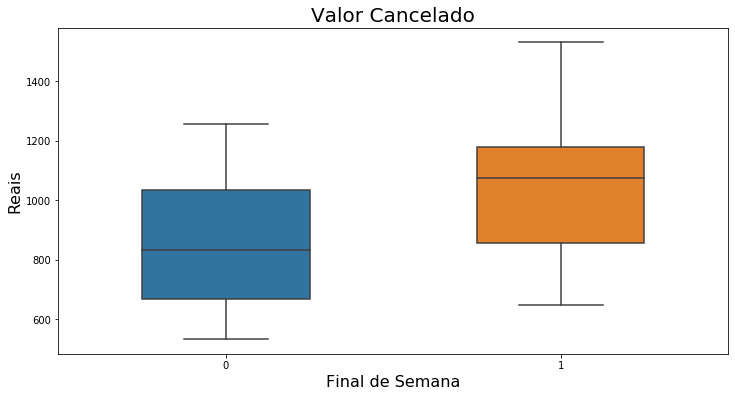

In [0]:
ax = sns.boxplot(y='valor_canc', x='fds', data=dataframe, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Valor Cancelado', fontsize=20)
ax.set_ylabel('Reais', fontsize=16)
ax.set_xlabel('Final de Semana', fontsize=16)
ax

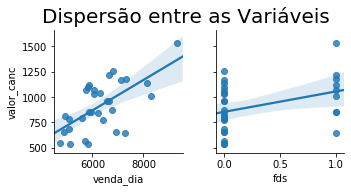

In [0]:
ax = sns.pairplot(dataframe, y_vars='valor_canc', x_vars=['venda_dia', 'fds'], kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

# Regresão Linear

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
y = dataframe['valor_canc']
X = dataframe[['venda_dia', 'fds']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [0]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

In [0]:
print(f'R² = {model.score(X_train, y_train).round(2)}')

R² = 0.29


## Gerando previsões para os dados de TESTE (X_test)

In [0]:
y_predict = model.predict(X_test)

## Obtendo o coeficiente de determinação (R²)

In [0]:
print(f'R² = {metrics.r2_score(y_test, y_predict).round(2)}')

R² = 0.44


## Conclusão


## Previsões

In [0]:
entry =  X_test[0:1]
model.predict(entry)[0].round(2)

957.47

## Simulador

In [0]:
venda_dia = 7000.0
fds = 1

entry = [[venda_dia, fds]]

print('R$ {0:.2f}'.format(model.predict(entry)[0]))

R$ 1031.51


## Obtendo os coeficientes de regressão

In [0]:
index = ['Intercepto', 'Vendas do Dia', 'Final de Semana']

pd.DataFrame(data=np.append(model.intercept_, model.coef_), index=index, columns=['Parâmetros'])

,Parâmetros
Intercepto,200.754254
Vendas do Dia,0.115323
Final de Semana,23.491744


## Interpretação dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=0$) o efeito médio no Valor de Cancelamento seria de <b>R$ 200,75</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Vendas do Dia</b> → Mantendo-se os valores de $X_3$ (Final de Semana) constantes, o acréscimo de 1 real na Venda do dia gera uma variação média no Valor Cancelado de <b>R$ 0,11</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Final de Semana (Sim/Não)</b> → Mantendo-se os valores de $X_2$ (Vendas do Dia) constantes, o fato de o dia ser classificado como Final de Semana gera uma variação média no Valor Cancelado de <b>R$ 23,49</b>.
</p>